In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [29]:
incidents_df = pd.read_csv("/Users/sanishareddy/Downloads/GRID_as_ccv_tables--usethis/20240229-GRID_PERPS.csv")
incidents_df.head()

/var/folders/lc/w78wfs6n3fq6kk92kdlwfcbh0000gn/T/ipykernel_10955/3573388582.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  incidents_df = pd.read_csv("/Users/sanishareddy/Downloads/GRID_as_ccv_tables--usethis/20240229-GRID_PERPS.csv")


,perp_incident_id,perp_cd,perp_name,unique_incident_id,incident_id,incident_seq,incident_date,incident_day,incident_month,incident_year,...,facility_lvl2_mi_04,facility_lvl2_mi_05,facility_lvl2_mi_06,facility_lvl2_ms_01,facility_lvl2_ms_02,facility_lvl2_ms_03,facility_lvl2_ms_04,facility_lvl2_ms_05,facility_lvl2_nn_01,facility_lvl2_un_01
0,000104E9-CDC1-814E-A6BF-693EAA72D518,9900,UNKNOWN,22069500,220695,0,2022-03-19,19,3,2022,...,0,0,0,0,0,0,0,0,0,0
1,000104E9-CDC1-814E-A6BF-693EAA72D5467,9900,UNKNOWN,180485000,1804850,0,2018-08-18,18,8,2018,...,0,1,0,0,0,0,0,0,0,0
2,00014B6D-9169-4002-B3E2-D69D7C53E29F,45,ISIS,22201400,222014,0,2022-05-14,14,5,2022,...,0,0,0,0,0,0,0,0,0,0
3,0001EAAB-5914-0C4A-88DE-2DF88108D3EF,9900,UNKNOWN,202099300,2020993,0,2020-06-24,24,6,2020,...,0,0,0,0,0,0,0,0,0,0
4,0003D9AF-E67E-4509-9936-029903863AC5,9900,UNKNOWN,22006301,220063,1,2022-01-06,6,1,2022,...,0,0,0,0,0,0,0,0,0,1


In [30]:
column_and_row_mappings = {
    'tactic_lvl2_tr_04': 'Suicide Bombing Tactic','tactic_lvl2_as_01': 'Shooting Tactic','tactic_lvl2_as_04': 'Bombing Tactic','tactic_lvl2_cv_02': 'Ambush Tactic',
    'victim_lvl1_gp': 'Civilians Victims','victim_lvl1_mi': 'Military Victims','victim_lvl2_go_07': 'Law Enforcement Victims','facility_lvl1_go': 'Government Locations',
    'facility_lvl1_mi': 'Military Locations','facility_lvl2_cu_03': 'Religious Locations','facility_lvl2_in_07': 'Road Transport Infrastructures Locations','weapon_lvl1_fi': 'Firearms weapons',  
    'weapon_lvl1_ex': 'Explosives weapon','weapon_lvl1_im': 'IEDs weapon','weapon_lvl1_ua': 'Drones weapon','weapon_lvl1_in': 'Incendiary weapon','weapon_lvl1_ml': 'Melee weapon','num_killed':'Num of Killed'
}


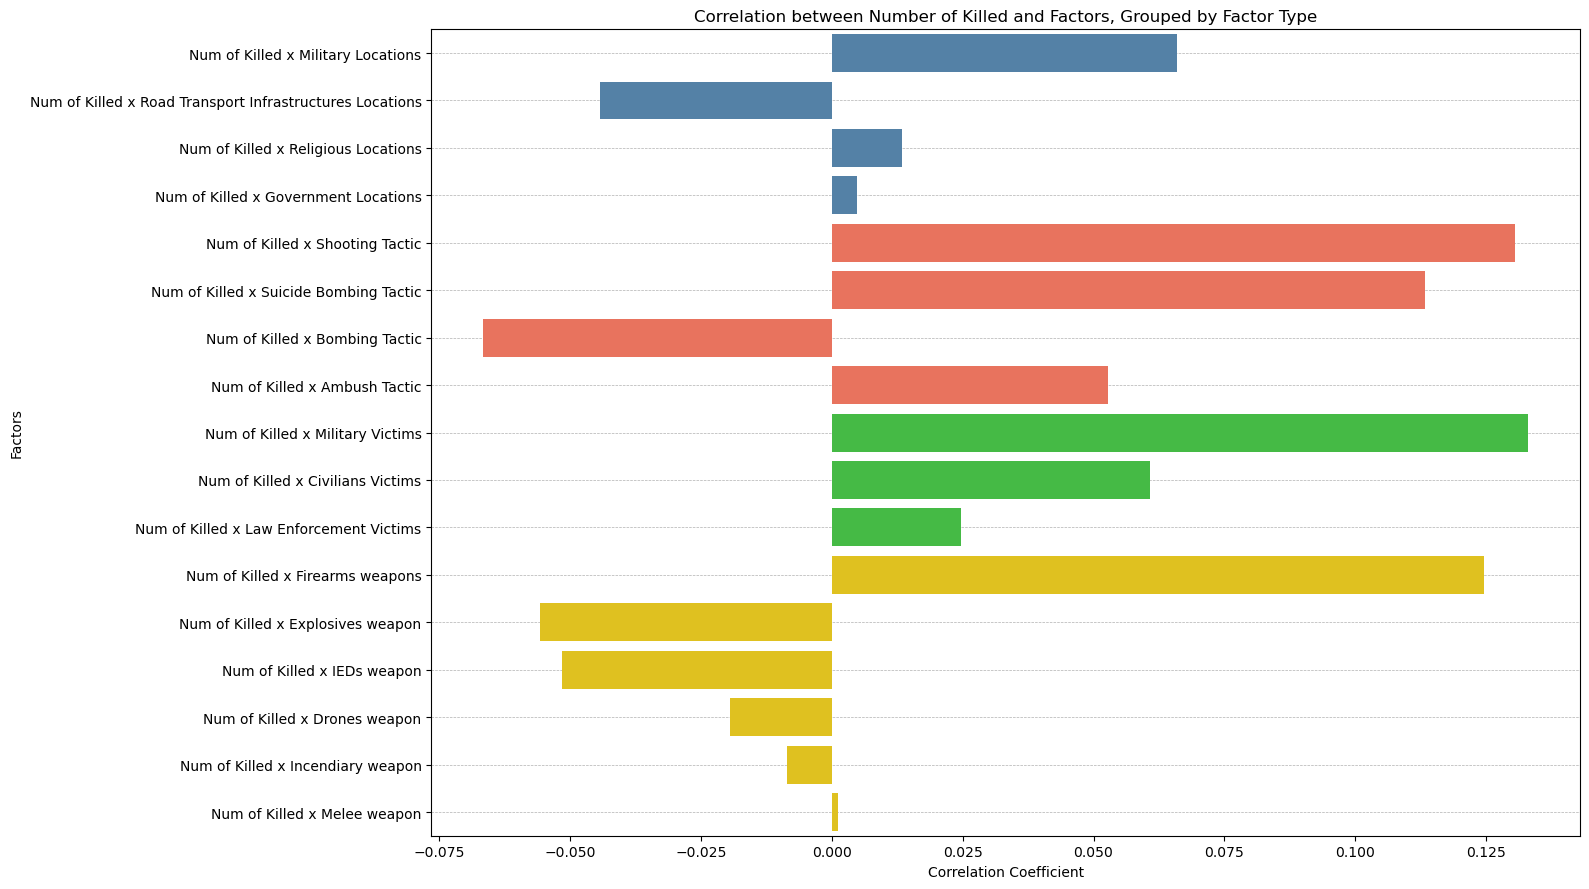

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# Your existing code for defining columns and loading data
# Example dataframe load (uncomment and modify the path as needed)
# incidents_df = pd.read_csv("path_to_your_data.csv")

killed_columns = [
    'num_killed'
]

factor_columns = [
    'tactic_lvl2_tr_04','tactic_lvl2_as_01','tactic_lvl2_as_04','tactic_lvl2_cv_02','victim_lvl1_gp','victim_lvl1_mi','victim_lvl2_go_07',
    'facility_lvl1_go','facility_lvl1_mi','facility_lvl2_cu_03','facility_lvl2_in_07','weapon_lvl1_fi','weapon_lvl1_im','weapon_lvl1_ex',
    'weapon_lvl1_ua','weapon_lvl1_in','weapon_lvl1_ml'
]

correlation_data = {
    'Pair': [],
    'Correlation': [],
    'P-value': [],
    'Factor Group': []
}

# Color palette assignment for each category
category_colors = {
    'victim': '#32CD32', # Lime Green for victims
    'facility': '#4682B4', # Steel Blue for locations
    'tactic': '#FF6347',   # Tomato for tactics
    'weapon': '#FFD700'    # Gold for weapons
}

# Correct the calculate_killed_factor_correlations function
def calculate_killed_factor_correlations(df, killed_cols, factor_cols):
    for killed_col in killed_cols:
        for factor_col in factor_cols:
            corr, p_val = pointbiserialr(df[killed_col], df[factor_col])
            label_killed = column_and_row_mappings.get(killed_col, killed_col)
            label_factor = column_and_row_mappings.get(factor_col, factor_col)
            factor_group = factor_col.split('_')[0]  # Correctly identifies the factor group
            correlation_data['Pair'].append(f"{label_killed} x {label_factor}")
            correlation_data['Correlation'].append(corr)
            correlation_data['P-value'].append(p_val)
            correlation_data['Factor Group'].append(factor_group)  # Keep only the factor group here

# Call the function to calculate correlations
calculate_killed_factor_correlations(incidents_df, killed_columns, factor_columns)

# Create the correlation DataFrame
correlation_df = pd.DataFrame(correlation_data)
correlation_df['Abs Correlation'] = correlation_df['Correlation'].abs()

# Now assign colors based on the 'Factor Group' to the 'Color' column
correlation_df['Color'] = correlation_df['Factor Group'].map(lambda x: category_colors.get(x, '#000000'))

# Sort by 'Factor Group' and 'Abs Correlation'
sorted_correlation_df = correlation_df.sort_values(by=['Factor Group', 'Abs Correlation'], ascending=[True, False])

# Now plot with the assigned colors
plt.figure(figsize=(16, 9))
# Set the zorder of the bars to be higher than the grid (which is by default 0.5)
barplot.set_zorder(10)

barplot = sns.barplot(
    x='Correlation', 
    y='Pair', 
    data=sorted_correlation_df, 
    palette=sorted_correlation_df['Color'].tolist()  # Use the 'Color' column for the palette
)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5,zorder=0)
plt.title('Correlation between Number of Killed and Factors, Grouped by Factor Type')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Factors')
plt.gca().set_axisbelow(True)
plt.tight_layout()

plt.show()


In [38]:
data = pd.read_csv("/Users/sanishareddy/Downloads/GRID_as_ccv_tables--usethis/20240229-GRID_PERPS.csv")
data.head()

/var/folders/lc/w78wfs6n3fq6kk92kdlwfcbh0000gn/T/ipykernel_10955/400571585.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/sanishareddy/Downloads/GRID_as_ccv_tables--usethis/20240229-GRID_PERPS.csv")


,perp_incident_id,perp_cd,perp_name,unique_incident_id,incident_id,incident_seq,incident_date,incident_day,incident_month,incident_year,...,facility_lvl2_mi_04,facility_lvl2_mi_05,facility_lvl2_mi_06,facility_lvl2_ms_01,facility_lvl2_ms_02,facility_lvl2_ms_03,facility_lvl2_ms_04,facility_lvl2_ms_05,facility_lvl2_nn_01,facility_lvl2_un_01
0,000104E9-CDC1-814E-A6BF-693EAA72D518,9900,UNKNOWN,22069500,220695,0,2022-03-19,19,3,2022,...,0,0,0,0,0,0,0,0,0,0
1,000104E9-CDC1-814E-A6BF-693EAA72D5467,9900,UNKNOWN,180485000,1804850,0,2018-08-18,18,8,2018,...,0,1,0,0,0,0,0,0,0,0
2,00014B6D-9169-4002-B3E2-D69D7C53E29F,45,ISIS,22201400,222014,0,2022-05-14,14,5,2022,...,0,0,0,0,0,0,0,0,0,0
3,0001EAAB-5914-0C4A-88DE-2DF88108D3EF,9900,UNKNOWN,202099300,2020993,0,2020-06-24,24,6,2020,...,0,0,0,0,0,0,0,0,0,0
4,0003D9AF-E67E-4509-9936-029903863AC5,9900,UNKNOWN,22006301,220063,1,2022-01-06,6,1,2022,...,0,0,0,0,0,0,0,0,0,1


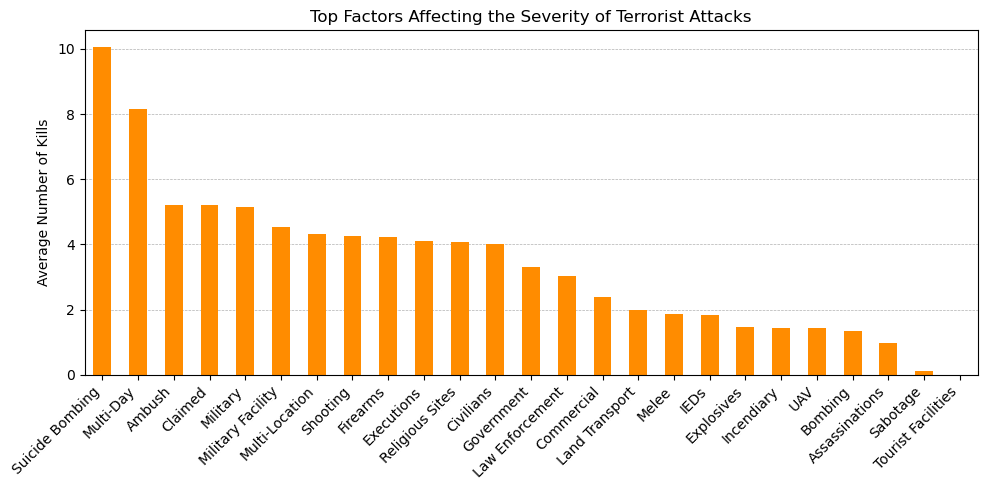

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Updating selected tactics and labels first
selected_tactics = ['tactic_lvl2_tr_04', 'tactic_lvl2_as_01', 'tactic_lvl2_as_04', 'tactic_lvl2_cv_02', 'tactic_lvl2_tr_02', 'tactic_lvl2_tr_08', 'tactic_lvl2_cv_03']
tactic_labels = ['Suicide Bombing', 'Shooting', 'Bombing', 'Ambush', 'Executions', 'Assassinations', 'Sabotage']

# Calculating average number of kills for selected tactics
average_kills_tactics = data[data[selected_tactics].sum(axis=1) > 0].groupby(data[selected_tactics].idxmax(axis=1))['num_killed'].mean().reindex(selected_tactics).fillna(0)

# Updating selected facility and labels
selected_facilities = ['facility_lvl1_co', 'facility_lvl1_go', 'facility_lvl1_mi', 'facility_lvl2_co_03', 'facility_lvl2_cu_03', 'facility_lvl2_in_07']
facility_labels = ['Commercial', 'Government', 'Military Facility', 'Tourist Facilities', 'Religious Sites', 'Land Transport']

# Calculating average number of kills for selected facilities
average_kills_facilities = data[data[selected_facilities].sum(axis=1) > 0].groupby(data[selected_facilities].idxmax(axis=1))['num_killed'].mean().reindex(selected_facilities).fillna(0)

# Updating selected victim and labels
selected_victims = ['victim_lvl1_gp', 'victim_lvl1_mi', 'victim_lvl2_go_07']
victim_labels = ['Civilians', 'Military', 'Law Enforcement']

# Calculating average number of kills for selected victims
average_kills_victims = data[data[selected_victims].sum(axis=1) > 0].groupby(data[selected_victims].idxmax(axis=1))['num_killed'].mean().reindex(selected_victims).fillna(0)

# For claimed attacks, assuming 'claimed' column is 1 for claimed, 0 otherwise
average_kills_claimed = data[data['claimed'] == 1]['num_killed'].mean()

# Updating selected weapons and labels
selected_weapons = ['weapon_lvl1_fi', 'weapon_lvl1_im', 'weapon_lvl1_ex', 'weapon_lvl1_in', 'weapon_lvl1_ua', 'weapon_lvl1_ml']
weapon_labels = ['Firearms', 'IEDs', 'Explosives', 'Incendiary', 'UAV', 'Melee']

# Calculating average number of kills for selected weapon types
average_kills_weapons = data[data[selected_weapons].sum(axis=1) > 0].groupby(data[selected_weapons].idxmax(axis=1))['num_killed'].mean().reindex(selected_weapons).fillna(0)

# Calculate average number of kills for incidents spanning multiple days
average_kills_multi_day = data[data['is_multi_day'] == 1]['num_killed'].mean()

# Calculate average number of kills for incidents occurring in multiple locations
average_kills_multi_location = data[data['is_multi_location'] == 1]['num_killed'].mean()

# Rename the indexes of the average kills Series before concatenating
average_kills_tactics.index = tactic_labels
average_kills_facilities.index = facility_labels
average_kills_victims.index = victim_labels
average_kills_weapons.index = weapon_labels

# Combining all calculated averages into one DataFrame for plotting
average_kills_combined = pd.concat([
    average_kills_tactics,
    average_kills_facilities,
    average_kills_victims,
    pd.Series({'Claimed': average_kills_claimed}),
    average_kills_weapons,
    pd.Series({'Multi-Day': average_kills_multi_day, 'Multi-Location': average_kills_multi_location})
])

# Sorting in highest order 
average_kills_combined_sorted_desc = average_kills_combined.sort_values(ascending=False)

average_kills_combined_sorted_desc.plot(kind='bar', color='darkorange', figsize=(10, 5))
plt.title('Top Factors Affecting the Severity of Terrorist Attacks')
plt.ylabel('Average Number of Kills')
plt.xticks(rotation=45, ha='right')

# Add horizontal grid lines for better readability
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()


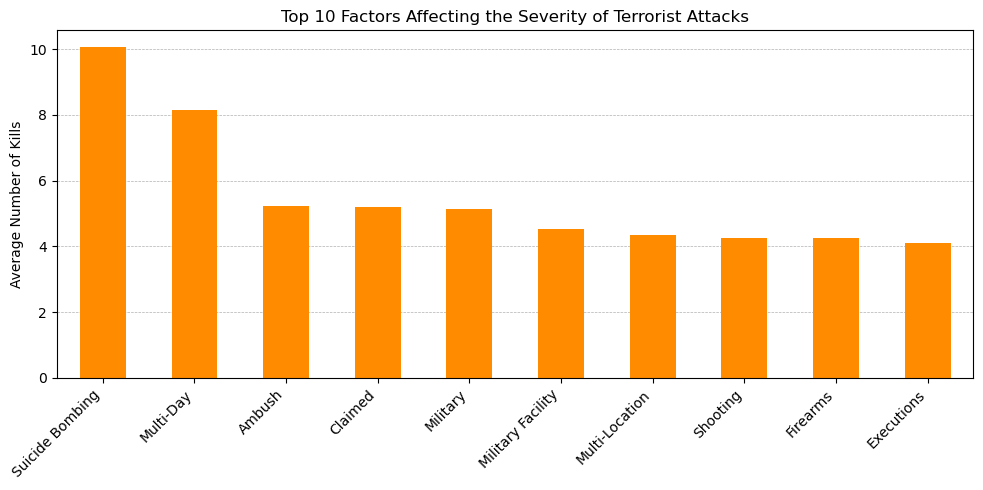

In [40]:
# Sorting in Highest order and selecting the top 10 for visualization
average_kills_combined_sorted_desc = average_kills_combined.sort_values(ascending=False).head(10)


average_kills_combined_sorted_desc.plot(kind='bar', color='darkorange', figsize=(10, 5))
plt.title('Top 10 Factors Affecting the Severity of Terrorist Attacks')
plt.ylabel('Average Number of Kills')
plt.xticks(rotation=45, ha='right')

# Add horizontal grid lines for better readability
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()